<a href="https://colab.research.google.com/github/ClarisseAlvarenga/DataScience_Comex_estudos/blob/master/Explorando_Dados_de_Importa%C3%A7%C3%A3o_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Base de Importadores do COMEX Stat

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importações Por Município em 2020

In [0]:
impo_por_municipio = pd.read_csv('/content/IMP_2020_MUN.csv', sep=";")

In [12]:
type(impo_por_municipio)

pandas.core.frame.DataFrame

In [13]:
impo_por_municipio.head()

,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB
0,2020,3,8421,271,PR,4119152,557,20155
1,2020,3,8417,160,SP,3424402,7,72
2,2020,3,8431,399,PR,4119905,127,7994
3,2020,3,8523,161,PR,4115200,42,44747
4,2020,3,8481,245,SP,3431803,0,134


In [23]:
impo_por_municipio

,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB
0,2020,3,8421,271,PR,4119152,557,20155
1,2020,3,8417,160,SP,3424402,7,72
2,2020,3,8431,399,PR,4119905,127,7994
3,2020,3,8523,161,PR,4115200,42,44747
4,2020,3,8481,245,SP,3431803,0,134
...,...,...,...,...,...,...,...,...
463463,2020,3,8474,573,SP,3452205,1304,18928
463464,2020,3,1515,190,SP,3452502,55,1063
463465,2020,3,2909,23,SP,3452502,1600,6711
463466,2020,3,7319,160,PR,4106902,1101,6352


In [0]:
impo_por_estado = impo_por_municipio.groupby('SG_UF_MUN')

In [28]:
#Importações por estado
impo_por_estado

In [0]:
impo_por_municipio.columns = ['ano', 'mes', 'codigo_produto', 'pais_origem','UF','codigo_municipio','peso_liquido','valor_FOB']

In [30]:
impo_por_municipio

,ano,mes,codigo_produto,pais_origem,UF,codigo_municipio,peso_liquido,valor_FOB
0,2020,3,8421,271,PR,4119152,557,20155
1,2020,3,8417,160,SP,3424402,7,72
2,2020,3,8431,399,PR,4119905,127,7994
3,2020,3,8523,161,PR,4115200,42,44747
4,2020,3,8481,245,SP,3431803,0,134
...,...,...,...,...,...,...,...,...
463463,2020,3,8474,573,SP,3452205,1304,18928
463464,2020,3,1515,190,SP,3452502,55,1063
463465,2020,3,2909,23,SP,3452502,1600,6711
463466,2020,3,7319,160,PR,4106902,1101,6352


In [32]:
#quantidade de municípios com empresas importadoras
impo_por_municipio.codigo_municipio.unique().shape[0]

1690

In [34]:
#quantidade de países de origem de empresas importadoras
impo_por_municipio.pais_origem.unique().shape[0]

215

In [36]:
#tipos de produtos importados
impo_por_municipio.codigo_produto.unique().shape

(1167,)

In [0]:
media_de_valor_por_estado = impo_por_municipio.groupby('UF').mean().round(2)['valor_FOB']

In [86]:
#calculando a média de valores importados por estado
media_de_valor_por_estado

UF
AC      24193.22
AL      89018.32
AM     351405.92
AP     132930.05
BA     174773.09
CE     145249.01
DF     321453.65
ES     252720.08
GO     157908.89
MA    1078881.02
MG      79893.52
MS     373644.19
MT     422308.85
ND      22841.78
PA     158213.17
PB     136506.28
PE     219828.73
PI     278814.09
PR     103919.30
RJ     309775.57
RN      44258.03
RO     101080.73
RR     137716.42
RS      78565.47
SC     111869.24
SE      86812.11
SP      81365.03
TO      88742.92
Name: valor_FOB, dtype: float64

In [89]:
type(media_de_valor_por_estado)

pandas.core.series.Series

In [0]:
import numpy as np

In [0]:
#transformando em DF
media_por_estado = media_de_valor_por_estado.to_frame().reset_index().sort_values('valor_FOB')

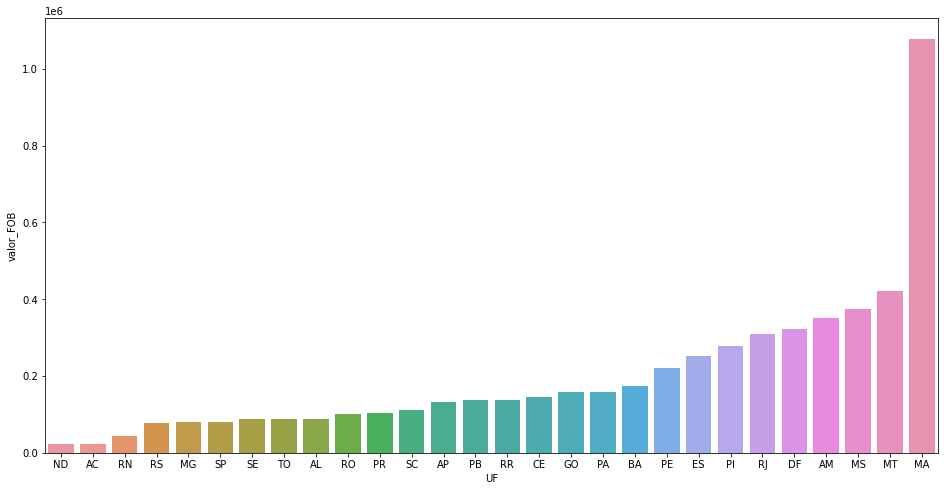

In [115]:
#Gráfico da média de valores importado por estado
plt.figure(figsize=(16,8))
sns.barplot(x='UF', y='valor_FOB', data=media_por_estado)

In [292]:
#descrevendo o valor FOB das importações
impo_por_municipio.describe().round(2)['valor_FOB']

count    4.634680e+05
mean     1.198802e+05
std      3.674591e+06
min      0.000000e+00
25%      5.570000e+02
50%      4.390000e+03
75%      3.060900e+04
max      1.890746e+09
Name: valor_FOB, dtype: float64

In [99]:
#valor total importado por estado em 2020
impo_por_municipio.groupby('UF').sum()['valor_FOB']

UF
AC         556444
AL      243554130
AM     3317974651
AP       43601056
BA     1668034387
CE      825740650
DF      503074967
ES     1960855068
GO     1066832494
MA      818870696
MG     2625540709
MS      752145750
MT      556603061
ND         936513
PA      440781893
PB      194794459
PE     1371071786
PI      130206180
PR     3664194690
RJ     8997741237
RN       57446917
RO      196197703
RR       15424239
RS     2222695805
SC     5279109258
SE       80561635
SP    18488901007
TO       37183283
Name: valor_FOB, dtype: int64

In [0]:
total_FOB_por_estado = impo_por_municipio.groupby('UF').sum()['valor_FOB'].to_frame().reset_index().sort_values('valor_FOB')

In [0]:
total_FOB_por_estado.columns = ['UF','valor_total']

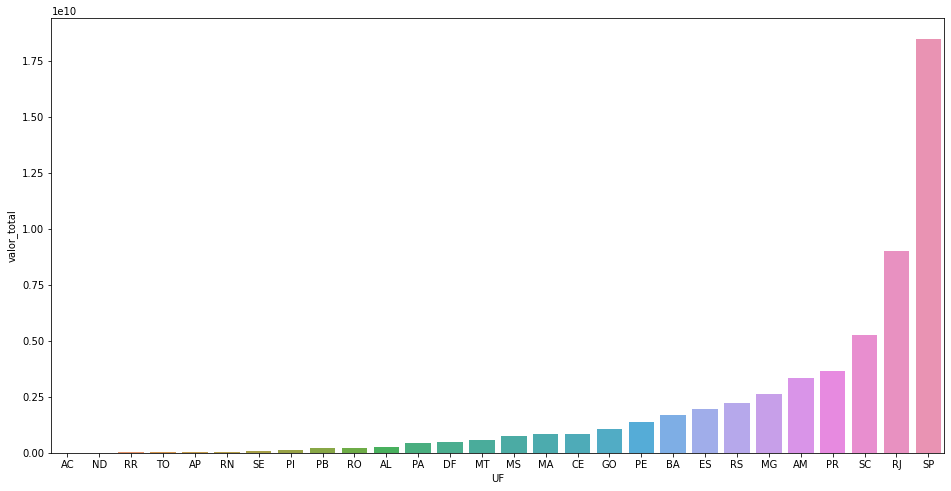

In [125]:
#visualizando o maior valor de importação por estado
plt.figure(figsize=(16,8))
sns.barplot(x='UF', y='valor_total', data=total_FOB_por_estado)

In [0]:
#unindo a média ao total importado
total_e_media = media_por_estado.join(total_FOB_por_estado.set_index('UF'), on='UF') 

In [128]:
total_e_media

,UF,valor_FOB,valor_total
13,ND,22841.78,936513
0,AC,24193.22,556444
20,RN,44258.03,57446917
23,RS,78565.47,2222695805
10,MG,79893.52,2625540709
26,SP,81365.03,18488901007
25,SE,86812.11,80561635
27,TO,88742.92,37183283
1,AL,89018.32,243554130
21,RO,101080.73,196197703


In [129]:
#visualizando o cadastro de empresas importadoras - arquivo bruto
pd.read_excel('/content/EMPRESAS_CADASTRO_2020.xlsx')

,SECRETARIA DE COMÉRCIO EXTERIOR,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CADASTRO DE EMPRESAS EXPORTADORAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(apenas CNPJ 14 dígitos),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PERÍODO: JANEIRO-ABRIL 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
18914,10380910000109,7 WAY COMERCIO DE MAQUINAS E EQUIPAMENTOS LTDA,AVENIDA JOAO CORREA,991,CENTRO,93020690,SAO LEOPOLDO,RS,4663 - Comércio atacadista de máquinas e equip...,206 - SOCIEDADE POR COTAS DE RESPONS. LIMITADA...
18915,22369082000189,7CS JEWELLERY INTERNATIONAL COMERCIO DE JOIAS ...,AVENIDA MAGALHAES DE CASTRO,12000,CIDADE JARDIM,05676120,SAO PAULO,SP,4783 - Comércio varejista de jóias e relógios,206 - SOCIEDADE POR COTAS DE RESPONS. LIMITADA...
18916,28771059000100,7OGUN IMPORTACAO E EXPORTACAO DE EQUIPAMENTOS ...,ALAMEDA ARACA,63,MOINHO VELHO,06714375,COTIA,SP,4689 - Comércio atacadista especializado de ou...,230 - EMPRESA INDIVIDUAL DE RESPONSABILIDADE L...
18917,16729231000251,7PETS COMERCIAL DO BRASIL S.A,RUA JUMECY RODRIGUES GOMES,331,CENTRO CONDOMINIO IN,27175000,PIRAI,RJ,4693 - Comércio atacadista de mercadorias em g...,205 - SOCIEDADE ANONIMA FECHADA-EMPRESA PRIVADA


In [130]:
#visualizando a quantidade de empresas - arquivo bruto
pd.read_excel('/content/QUANTIDADE_EMPRESAS.xlsx')

,Quantidade de Operadores por Faixas de Valor,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,DADOS ATÉ ABR/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TIPO,EXP,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Soma de NUM_EMPRESAS,Rótulos de Coluna,NaN,NaN,NaN,NaN,NaN,NaN
6,ANO,2 - Entre US$ 50 e US$ 100 milhões,3 - Entre US$ 10 e US$ 50 milhões,4 - Entre US$ 5 e US$ 10 milhões,5 - Entre US$ 1 e US$ 5 milhões,6 - Até US$ 1 milhão,1 - Acima de US$ 100 milhões,Total Geral
7,1997,115,670,534,1973,12089,87,15468
8,1998,116,611,505,1889,12605,81,15807
9,1999,100,570,525,1953,13892,79,17119


In [135]:
#arquivo ajustado
empresas_importadoras = pd.read_excel('/content/total_empresas_importadoras.xlsx')
empresas_importadoras.head()

,ANO,2 - Entre US$ 50 e US$ 100 milhões,3 - Entre US$ 10 e US$ 50 milhões,4 - Entre US$ 5 e US$ 10 milhões,5 - Entre US$ 1 e US$ 5 milhões,6 - Até US$ 1 milhão,1 - Acima de US$ 100 milhões,Total Geral
0,1997,89,719,774,3684,35170,68,40504
1,1998,85,726,762,3594,33937,71,39175
2,1999,89,601,625,2998,25573,62,29948
3,2000,86,643,709,3197,26381,72,31088
4,2001,75,677,704,3167,26864,79,31566


In [297]:
#vamos tentar visualizar a distribuição dos importadores por segmento
#primeiro vamos transpor o DF para pegar os dados por ano
empresas_importadoras_por_ano = empresas_importadoras.transpose()
empresas_importadoras_por_ano



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
ANO,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Geral
2 - Entre US$ 50 e US$ 100 milhões,89,85,89,86,75,77,77,87,98,135,169,263,204,259,319,317,359,331,289,238,276,321,315,100,4658
3 - Entre US$ 10 e US$ 50 milhões,719,726,601,643,677,586,579,721,832,937,1244,1512,1356,1733,2003,2012,2033,2019,1693,1505,1693,1745,1744,733,30046
4 - Entre US$ 5 e US$ 10 milhões,774,762,625,709,704,601,643,746,763,926,1067,1254,1168,1463,1668,1708,1708,1676,1449,1297,1348,1455,1444,688,26646
5 - Entre US$ 1 e US$ 5 milhões,3684,3594,2998,3197,3167,2835,2691,2886,3353,3658,4256,5033,4837,5821,6381,6257,6527,6617,5670,4962,5174,5484,5729,3276,108087
6 - Até US$ 1 milhão,35170,33937,25573,26381,26864,24008,20895,20564,20369,21840,25379,28532,30133,33416,36348,36757,38274,38610,38040,34309,35626,35860,38162,27618,732665
1 - Acima de US$ 100 milhões,68,71,62,72,79,66,68,83,90,116,157,232,173,255,315,317,343,316,256,207,219,256,261,61,4143
Total Geral,40504,39175,29948,31088,31566,28173,24953,25087,25505,27612,32272,36826,37871,42947,47034,47368,49244,49569,47397,42518,44336,45121,47655,32476,906245


In [298]:
empresas_importadoras_por_ano.iloc[0]

0            1997
1            1998
2            1999
3            2000
4            2001
5            2002
6            2003
7            2004
8            2005
9            2006
10           2007
11           2008
12           2009
13           2010
14           2011
15           2012
16           2013
17           2014
18           2015
19           2016
20           2017
21           2018
22           2019
23           2020
24    Total Geral
Name: ANO, dtype: object

In [0]:
total_importadores = empresas_importadoras[['ANO', 'Total Geral']]

In [139]:
total_importadores

,ANO,Total Geral
0,1997,40504
1,1998,39175
2,1999,29948
3,2000,31088
4,2001,31566
5,2002,28173
6,2003,24953
7,2004,25087
8,2005,25505
9,2006,27612


In [141]:
total_importadores.drop(index=24, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [142]:
total_importadores

,ANO,Total Geral
0,1997,40504
1,1998,39175
2,1999,29948
3,2000,31088
4,2001,31566
5,2002,28173
6,2003,24953
7,2004,25087
8,2005,25505
9,2006,27612


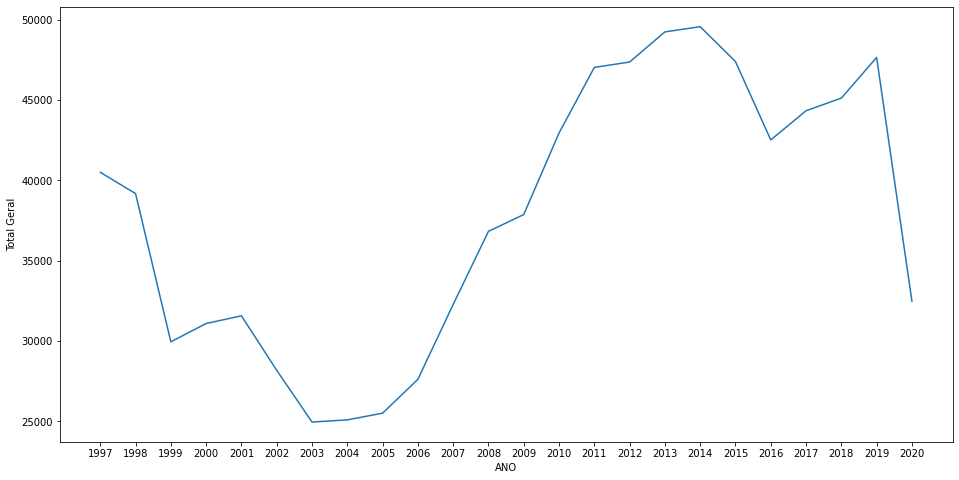

In [144]:
plt.figure(figsize=(16,8))
sns.lineplot(x='ANO', y='Total Geral', data=total_importadores)

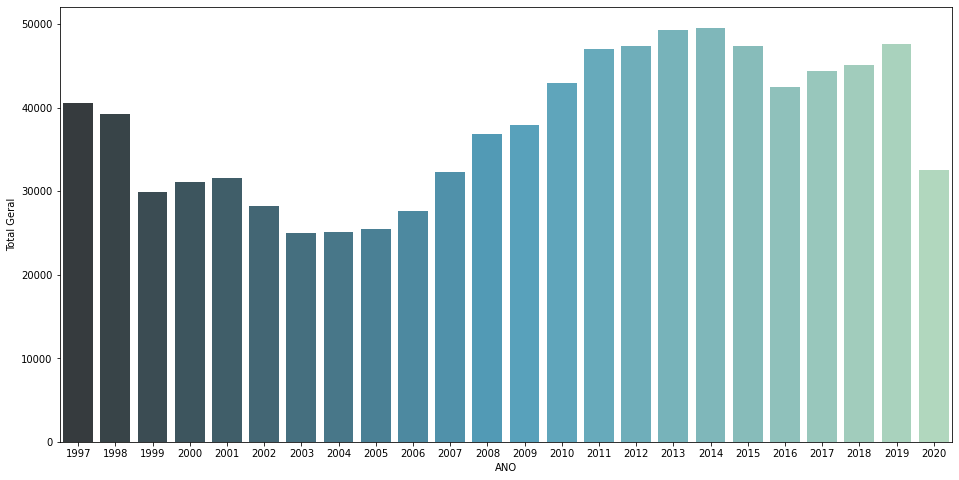

In [152]:
plt.figure(figsize=(16,8))
sns.barplot(x='ANO', y='Total Geral', data=total_importadores, palette='GnBu_d')

In [154]:
total_importadores['aumento'] = total_importadores['Total Geral'].diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [155]:
total_importadores

,ANO,Total Geral,aumento
0,1997,40504,NaN
1,1998,39175,-1329.0
2,1999,29948,-9227.0
3,2000,31088,1140.0
4,2001,31566,478.0
5,2002,28173,-3393.0
6,2003,24953,-3220.0
7,2004,25087,134.0
8,2005,25505,418.0
9,2006,27612,2107.0


In [0]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent') #cores
  sns.set_style('darkgrid') #estilo das linhas de grade
  #atribuir o gráfico a uma variável - tira as informações do objeto da visualização além de facilitar a customização
  ax = sns.lineplot(x=x, y=y, data = dataset) #define o tipo do gráfico e das variáveis
  ax.figure.set_size_inches(12,6) #configura o tamanho
  ax.set_title(titulo,loc='left', fontsize=18) #configura o título
  ax.set_xlabel(labelx, fontsize=14) #configura o rótulo do eixo X
  ax.set_ylabel(labely, fontsize=14) # configura o rótulo do eixo Y
  ax=ax

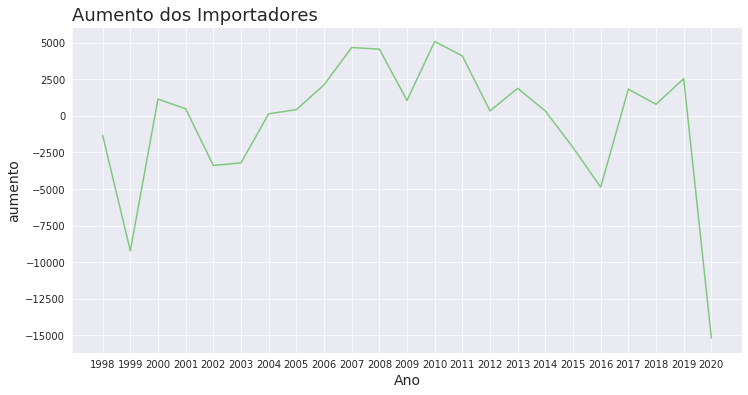

In [159]:
plotar('Aumento dos Importadores', 'Ano', 'aumento', 'ANO', 'aumento', total_importadores)

In [158]:
total_importadores['aceleracao'] = total_importadores['aumento'].diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


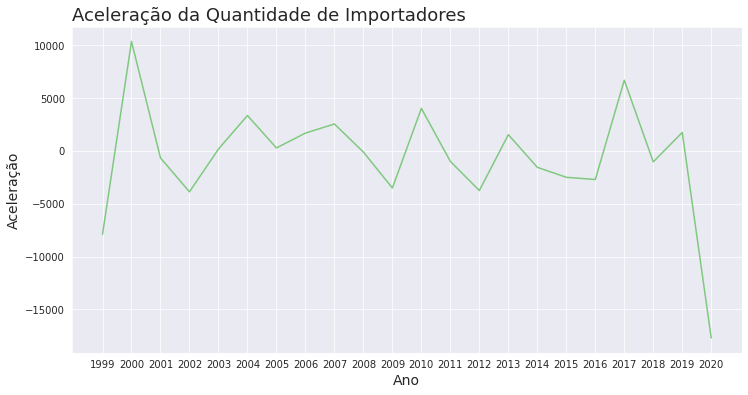

In [160]:
plotar('Aceleração da Quantidade de Importadores', 'Ano', 'Aceleração', 'ANO', 'aceleracao', total_importadores)

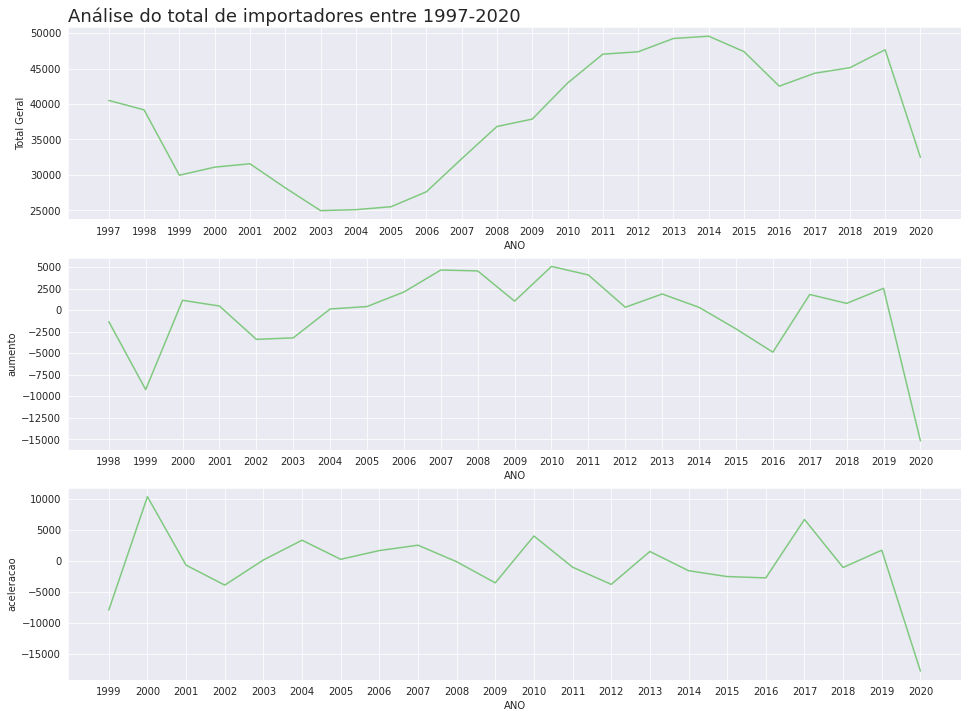

In [162]:
#juntando os gráficos
#criando um grid
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1) #3 linhas, um gráfico por linha
ax.set_title('Análise do total de importadores entre 1997-2020', fontsize=18, loc='left')
sns.lineplot(x='ANO', y='Total Geral', data = total_importadores)
plt.subplot(3,1,2)
sns.lineplot(x='ANO', y='aumento', data = total_importadores)
plt.subplot(3,1,3)
sns.lineplot(x='ANO', y='aceleracao', data = total_importadores)
ax=ax

In [166]:
valor_importado_por_mes = pd.read_csv('/content/IMP_2016_2019_20200516.csv', sep=';')
valor_importado_por_mes.head()

,Ano,Mês,Valor FOB (US$)
0,2019,7,17759476963
1,2019,10,17027283951
2,2019,9,16495171374
3,2019,1,16387829960
4,2019,8,15569921736


In [0]:
valor_importado_por_mes.sort_values(by=['Ano', 'Mês'], inplace=True)

In [0]:
valor_importado_por_mes['aumento'] = valor_importado_por_mes['Valor FOB (US$)'].diff()

In [0]:
valor_importado_por_mes['aceleracao'] = valor_importado_por_mes['aumento'].diff()

In [0]:
def plot_comparacao(x, y1, y2,y3, dataset,titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1) #3 linhas, um gráfico por linha
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data = dataset)
  ax=ax

In [173]:
valor_importado_por_mes

,Ano,Mês,Valor FOB (US$),aumento,aceleracao
46,2016,1,10322817689,NaN,NaN
47,2016,2,10310002857,-1.281483e+07,NaN
40,2016,3,11560680865,1.250678e+09,1.263493e+09
45,2016,4,10510187072,-1.050494e+09,-2.301172e+09
44,2016,5,11138188323,6.280013e+08,1.678495e+09
37,2016,6,12771343238,1.633155e+09,1.005154e+09
39,2016,7,11753856964,-1.017486e+09,-2.650641e+09
36,2016,8,12849081694,1.095225e+09,2.112711e+09
38,2016,9,11994668595,-8.544131e+08,-1.949638e+09
43,2016,10,11379593538,-6.150751e+08,2.393380e+08


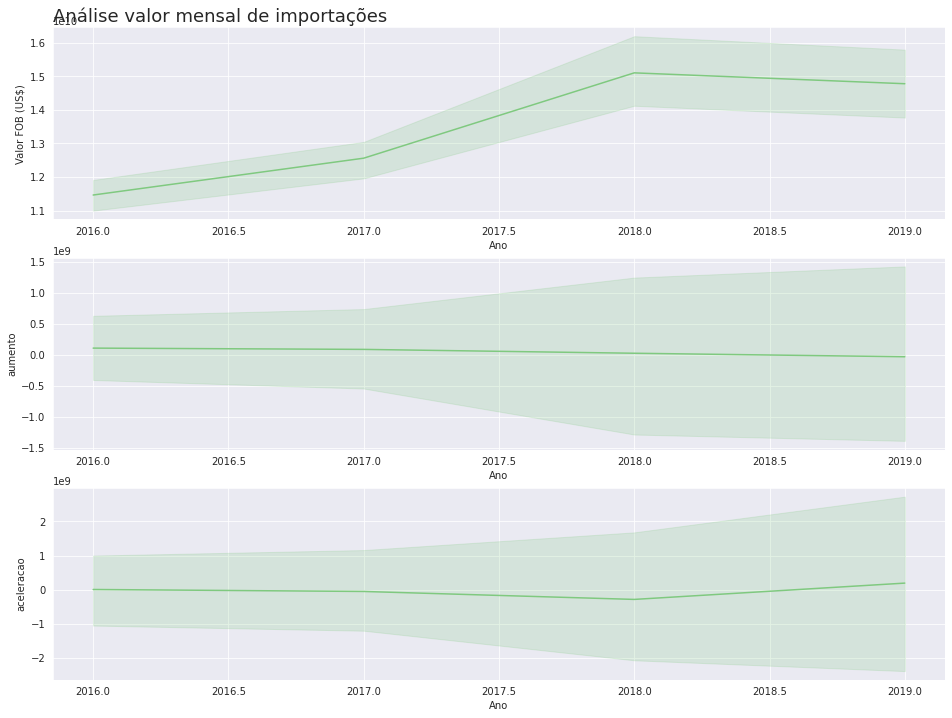

In [175]:
plot_comparacao('Ano', 'Valor FOB (US$)', 'aumento', 'aceleracao', valor_importado_por_mes, 'Análise valor mensal de importações')

In [0]:
valor_importado_por_ano = valor_importado_por_mes.groupby('Ano').sum()['Valor FOB (US$)'].to_frame().reset_index()

In [182]:
valor_importado_por_ano

,Ano,Valor FOB (US$)
0,2016,137585830976
1,2017,150749494421
2,2018,181230568862
3,2019,177347934749


In [0]:
valor_importado_por_ano['aumento'] = valor_importado_por_ano['Valor FOB (US$)'].diff()

In [0]:
valor_importado_por_ano['aceleracao'] = valor_importado_por_ano['Valor FOB (US$)'].diff()

In [185]:
valor_importado_por_ano

,Ano,Valor FOB (US$),aumento,aceleracao
0,2016,137585830976,NaN,NaN
1,2017,150749494421,1.316366e+10,1.316366e+10
2,2018,181230568862,3.048107e+10,3.048107e+10
3,2019,177347934749,-3.882634e+09,-3.882634e+09


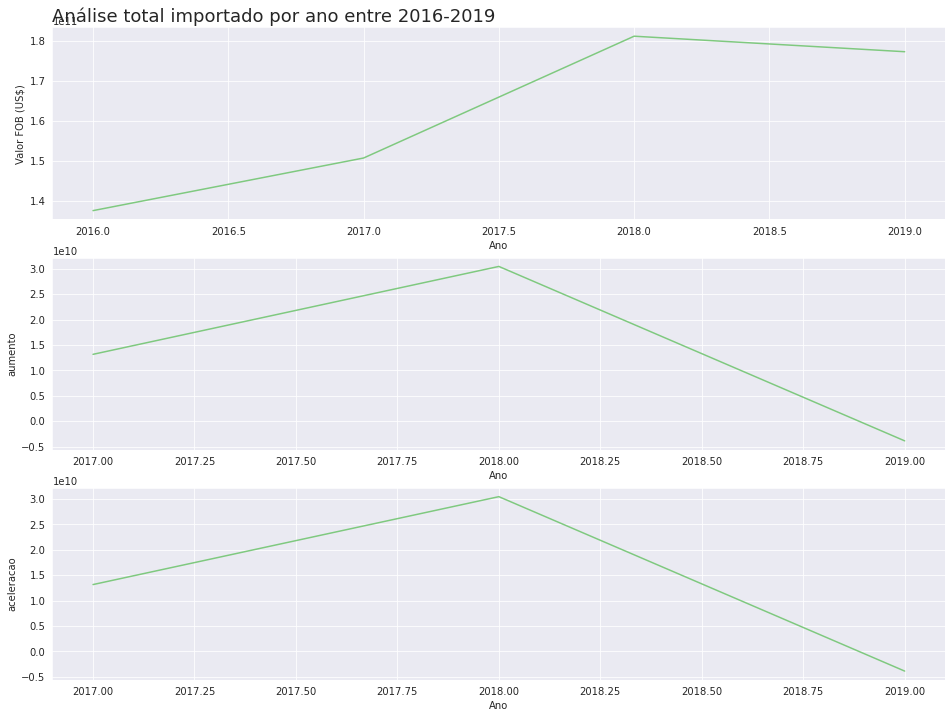

In [186]:
plot_comparacao('Ano', 'Valor FOB (US$)', 'aumento', 'aceleracao', valor_importado_por_ano, 'Análise total importado por ano entre 2016-2019')

In [187]:
pd.read_csv('/content/IMP_2010_2020_20200516.csv', sep=';')

,Ano,Valor FOB (US$)
0,2020,55560630668
1,2019,177347934749
2,2018,181230568862
3,2017,150749494421
4,2016,137585830976
5,2015,171458999759
6,2014,229127843314
7,2013,239681231635
8,2012,223366721023
9,2011,226244222128


In [0]:
impo_2010_2020_valor = pd.read_csv('/content/IMP_2010_2020_20200516.csv', sep=';')

In [212]:
impo_2010_2020_valor.reindex(index=impo_2010_2020_valor.index[::-1])

,Ano,Valor FOB (US$)
10,2010,181774969378
9,2011,226244222128
8,2012,223366721023
7,2013,239681231635
6,2014,229127843314
5,2015,171458999759
4,2016,137585830976
3,2017,150749494421
2,2018,181230568862
1,2019,177347934749


In [209]:
impo_2010_2020_valor.loc()

In [0]:
impo_2010_2020_valor = impo_2010_2020_valor.sort_values(by='Ano')

In [0]:
def criar_colunas_aumento_aceleracao(dataset, coluna):
  dataset['aumento'] = dataset[coluna].diff()
  dataset['aceleracao'] = dataset['aumento'].diff()

In [0]:
criar_colunas_aumento_aceleracao(impo_2010_2020_valor, 'Valor FOB (US$)')

In [217]:
impo_2010_2020_valor

,Ano,Valor FOB (US$),aumento,aceleracao
10,2010,181774969378,NaN,NaN
9,2011,226244222128,4.446925e+10,NaN
8,2012,223366721023,-2.877501e+09,-4.734675e+10
7,2013,239681231635,1.631451e+10,1.919201e+10
6,2014,229127843314,-1.055339e+10,-2.686790e+10
5,2015,171458999759,-5.766884e+10,-4.711546e+10
4,2016,137585830976,-3.387317e+10,2.379567e+10
3,2017,150749494421,1.316366e+10,4.703683e+10
2,2018,181230568862,3.048107e+10,1.731741e+10
1,2019,177347934749,-3.882634e+09,-3.436371e+10


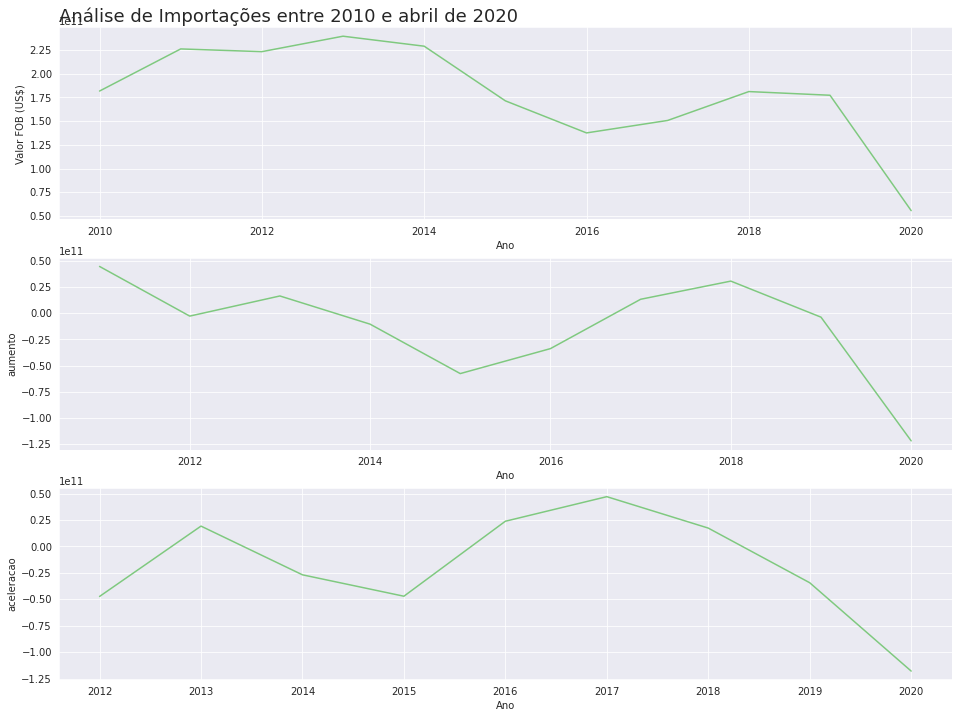

In [218]:
plot_comparacao('Ano', 'Valor FOB (US$)', 'aumento', 'aceleracao', impo_2010_2020_valor, 'Análise de Importações entre 2010 e abril de 2020')

In [221]:
impo_2010_2019_valor = impo_2010_2020_valor.drop(index=0)
impo_2010_2019_valor

,Ano,Valor FOB (US$),aumento,aceleracao
10,2010,181774969378,NaN,NaN
9,2011,226244222128,4.446925e+10,NaN
8,2012,223366721023,-2.877501e+09,-4.734675e+10
7,2013,239681231635,1.631451e+10,1.919201e+10
6,2014,229127843314,-1.055339e+10,-2.686790e+10
5,2015,171458999759,-5.766884e+10,-4.711546e+10
4,2016,137585830976,-3.387317e+10,2.379567e+10
3,2017,150749494421,1.316366e+10,4.703683e+10
2,2018,181230568862,3.048107e+10,1.731741e+10
1,2019,177347934749,-3.882634e+09,-3.436371e+10


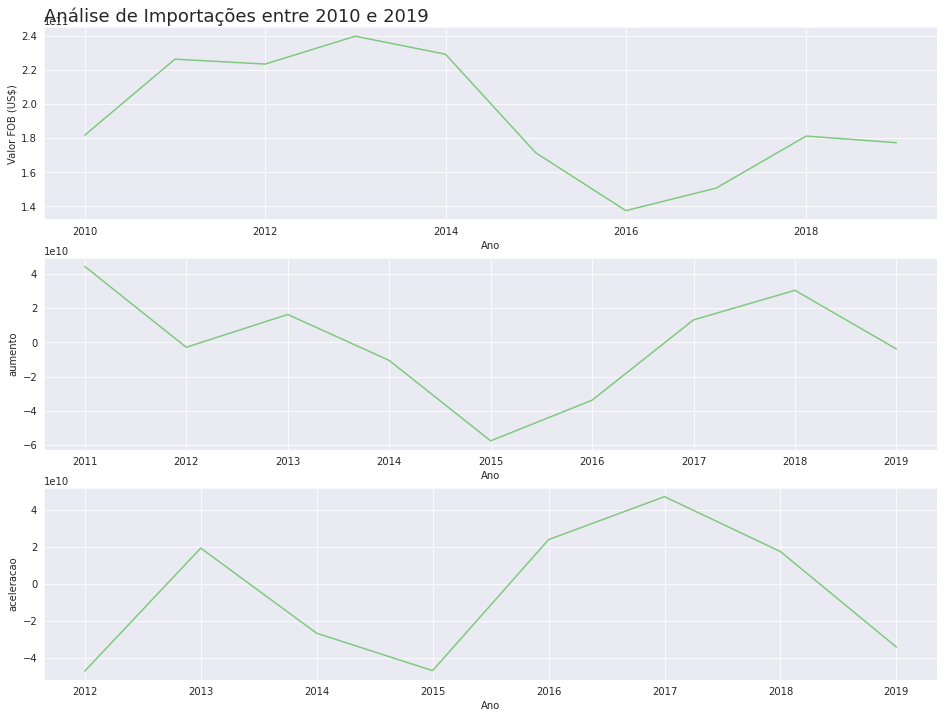

In [222]:
plot_comparacao('Ano', 'Valor FOB (US$)', 'aumento', 'aceleracao', impo_2010_2019_valor, 'Análise de Importações entre 2010 e 2019')

In [223]:
impo_por_municipio.columns

Index(['ano', 'mes', 'codigo_produto', 'pais_origem', 'UF', 'codigo_municipio',
       'peso_liquido', 'valor_FOB'],
      dtype='object')

In [235]:
impo_por_pais = impo_por_municipio.groupby('pais_origem').sum()['valor_FOB'].to_frame().reset_index()
impo_por_pais

,pais_origem,valor_FOB
0,13,68298
1,15,6036
2,17,186424
3,23,3243284203
4,31,32213
...,...,...
210,863,309252
211,866,20205
212,870,14607
213,888,1944514


In [232]:
paises = pd.read_excel('/content/TABELAS_AUXILIARES.xlsx', sheet_name='11')
paises.head()

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"


In [0]:
paises_por_codigo = paises[['CO_PAIS', 'NO_PAIS']]

#proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

In [0]:
paises_por_codigo.columns = ['pais_origem', 'nome_pais']

In [245]:
paises_por_codigo

,pais_origem,nome_pais
0,0,Não Definido
1,13,Afeganistão
2,15,"Aland, Ilhas"
3,17,Albânia
4,20,"Alboran-Perejil, Ilhas"
...,...,...
276,994,A Designar
277,995,Bancos Centrais
278,997,Organizações Internacionais
279,998,Sem informação


In [248]:
impo_por_pais


,valor_FOB,nome_pais
pais_origem,,
13,68298,Afeganistão
15,6036,"Aland, Ilhas"
17,186424,Albânia
23,3243284203,Alemanha
31,32213,Burkina Faso
...,...,...
863,309252,"Virgens, Ilhas (Britânicas)"
866,20205,"Virgens, Ilhas (Americanas)"
870,14607,Fiji


In [250]:
impo_por_pais.valor_FOB.isnull()

pais_origem
13     False
15     False
17     False
23     False
31     False
       ...  
863    False
866    False
870    False
888    False
890    False
Name: valor_FOB, Length: 215, dtype: bool

In [251]:
impo_por_pais.dropna()


,valor_FOB,nome_pais
pais_origem,,
13,68298,Afeganistão
15,6036,"Aland, Ilhas"
17,186424,Albânia
23,3243284203,Alemanha
31,32213,Burkina Faso
...,...,...
863,309252,"Virgens, Ilhas (Britânicas)"
866,20205,"Virgens, Ilhas (Americanas)"
870,14607,Fiji


In [0]:
impo_por_pais = impo_por_pais.sort_values(by='valor_FOB')
os_10_maiores_paises = impo_por_pais.tail(11)


In [0]:
os_10_maiores_paises = os_10_maiores_paises.reset_index()
os_10_maiores_paises = os_10_maiores_paises.drop(index=8)


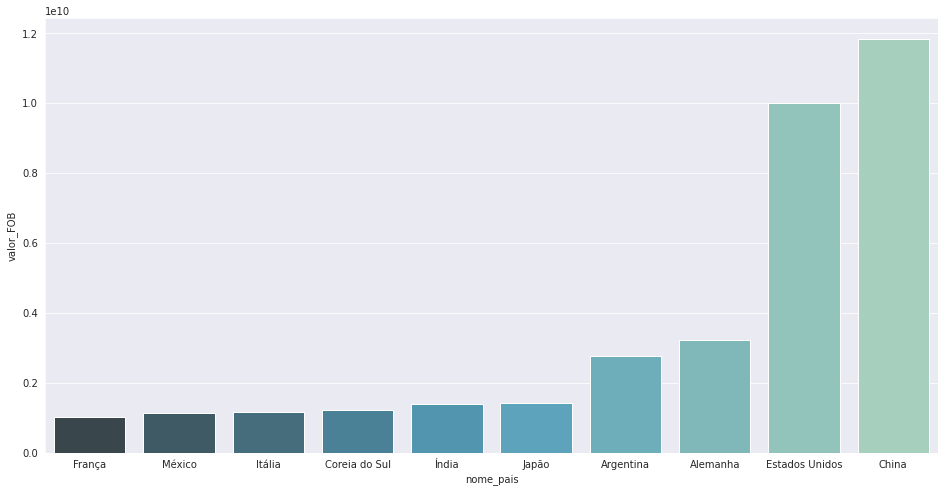

In [288]:
plt.figure(figsize=(16,8))
sns.barplot(x='nome_pais', y='valor_FOB', data=os_10_maiores_paises, palette='GnBu_d')